Dưới đây là phân tích và hướng dẫn chi tiết cho **Chủ đề T10: Bản đồ không gian hóa học của các phân tử ChEMBL** – phục vụ cho nghiên cứu và phát triển thuốc, kết hợp dữ liệu từ PostgreSQL (ChEMBL 35) và công cụ RDKit.

---

## 🧠 1. Phân tích chủ đề | Topic Analysis

**Tiếng Việt:**
Chủ đề này nhằm xây dựng bản đồ không gian hóa học (“chemical space map”) của các phân tử trong Cơ sở dữ liệu ChEMBL. Không gian hóa học là một cách biểu diễn các phân tử bằng vectơ đặc trưng (molecular descriptors hoặc fingerprints), sau đó giảm chiều bằng PCA/t-SNE/UMAP để trực quan hóa sự phân bố và cụm các phân tử theo tính chất hóa học.

**English:**
This topic focuses on constructing a chemical space map of molecules in the ChEMBL database. The chemical space is generated by converting molecules into feature vectors (descriptors or fingerprints), followed by dimensionality reduction techniques like PCA, t-SNE, or UMAP to visualize clusters and trends based on molecular properties.

---

## 🧬 2. Mô hình phân tích | Analysis Pipeline

| Step | Description (EN)                                        | Mô tả (VI)                                 |
| ---- | ------------------------------------------------------- | ------------------------------------------ |
| 1    | Extract 100 molecules from ChEMBL with canonical SMILES | Trích xuất 100 phân tử có SMILES chuẩn hóa |
| 2    | Compute molecular fingerprints (ECFP/Morgan)            | Tính dấu vân tay phân tử                   |
| 3    | Apply PCA/t-SNE/UMAP for dimensionality reduction       | Giảm chiều dữ liệu                         |
| 4    | Visualize chemical space using 2D scatter plots         | Trực quan hóa bằng đồ thị 2D               |
| 5    | Optional: cluster molecules based on similarity         | (Tùy chọn) Phân cụm theo độ tương đồng     |

---

## 🧪 3. Hướng dẫn song ngữ + Code thực tế

### 📌 SQL Example 1 – Extract SMILES

```sql
-- T10_1_extract_smiles.sql
SELECT mol.molregno, mol.canonical_smiles
FROM compound_structures AS mol
JOIN compound_records AS cr ON mol.molregno = cr.molregno
WHERE mol.canonical_smiles IS NOT NULL
LIMIT 100;
```

> 🇻🇳 Truy vấn này lấy 100 SMILES chuẩn để phân tích.
> 🇺🇸 This query fetches 100 canonical SMILES for analysis.

---

### 🧪 Python Example 1 – Convert SMILES to Fingerprints

```python
from rdkit import Chem
from rdkit.Chem import AllChem
import pandas as pd

df = pd.read_csv("../data/T10_1_extract_smiles.csv")
df['mol'] = df['canonical_smiles'].apply(Chem.MolFromSmiles)
df['fp'] = df['mol'].apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=2, nBits=1024))
```

---

### 🧪 Python Example 2 – Convert fingerprints to NumPy vectors

```python
import numpy as np

def fp_to_np(fp):
    arr = np.zeros((1,), dtype=int)
    Chem.DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

X = np.array([fp_to_np(fp) for fp in df['fp']])
```

---

### 🧪 Python Example 3 – Apply PCA for 2D mapping

```python
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.title("Chemical Space Map (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()
```

---

### 🧪 Python Example 4 – Apply t-SNE for 2D mapping

```python
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title("Chemical Space Map (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()
```

---

### 🧪 Python Example 5 – Save descriptors to CSV

```python
desc_df = pd.DataFrame(X, columns=[f'bit_{i}' for i in range(1024)])
desc_df.insert(0, 'molregno', df['molregno'])
desc_df.to_csv("../data/T10_fingerprints.csv", index=False)
```

---

## 🔧 4. Gợi ý file notebook & dữ liệu (AIMLOps structure)

* 📁 `notebook/T10_1_extract_and_visualize.ipynb` – extract & map chemical space
* 📁 `data/T10_1_extract_smiles.csv` – SMILES file from SQL
* 📁 `data/T10_fingerprints.csv` – Bit vector matrix for ML

---

## 📌 Lưu ý kỹ thuật | Technical Notes

* ✅ Giới hạn 100 dòng để tránh nặng máy
* ✅ Dùng `MolFromSmiles` cẩn thận với SMILES lỗi
* ✅ Vô hiệu hóa cảnh báo nếu cần:

```python
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
```

---

Bạn muốn tôi tiếp tục tạo file `.ipynb` mẫu cho `T10_1_extract_and_visualize.ipynb`?


In [13]:
from rdkit import Chem
import pandas as pd

import warnings
warnings.filterwarnings("ignore", category=UserWarning)

df = pd.read_csv("../data/T10_1_extract_smiles.csv")

# Fix: Ensure only valid strings are passed
df = df[df['canonical_smiles'].apply(lambda x: isinstance(x, str))].copy()

# Convert SMILES to Mol objects
df['mol'] = df['canonical_smiles'].apply(Chem.MolFromSmiles)

# Optionally drop invalid molecules
df = df[df['mol'].notnull()]
df['fp'] = df['mol'].apply(lambda m: AllChem.GetMorganFingerprintAsBitVect(m, radius=2, nBits=1024))
df

[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerator
[20:11:27] DEPRECATION WARNING: please use MorganGenerat

,molregno,canonical_smiles,mol,fp
0,1,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccccc1Cl,<rdkit.Chem.rdchem.Mol object at 0x000001D57AE...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
1,2,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(C#N)cc1,<rdkit.Chem.rdchem.Mol object at 0x000001D57AE...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
2,3,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(O)c1ccc(Cl)cc1,<rdkit.Chem.rdchem.Mol object at 0x000001D57AE...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,4,Cc1ccc(C(=O)c2ccc(-n3ncc(=O)[nH]c3=O)cc2)cc1,<rdkit.Chem.rdchem.Mol object at 0x000001D57AF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
4,5,Cc1cc(-n2ncc(=O)[nH]c2=O)ccc1C(=O)c1ccc(Cl)cc1,<rdkit.Chem.rdchem.Mol object at 0x000001D57AF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
95,78,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(=O)c1ccc(Cl)cc1,<rdkit.Chem.rdchem.Mol object at 0x000001D57AF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
96,78,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(=O)c1ccc(Cl)cc1,<rdkit.Chem.rdchem.Mol object at 0x000001D57AF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
97,78,Cc1cc(-n2ncc(=O)[nH]c2=O)cc(C)c1C(=O)c1ccc(Cl)cc1,<rdkit.Chem.rdchem.Mol object at 0x000001D57AF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."
98,79,Cc1cc(Cl)ccc1C(=O)c1ccc(-n2ncc(=O)[nH]c2=O)cc1C,<rdkit.Chem.rdchem.Mol object at 0x000001D57AF...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, ..."


In [14]:
import numpy as np

def fp_to_np(fp):
    arr = np.zeros((1,), dtype=int)
    Chem.DataStructs.ConvertToNumpyArray(fp, arr)
    return arr

X = np.array([fp_to_np(fp) for fp in df['fp']])


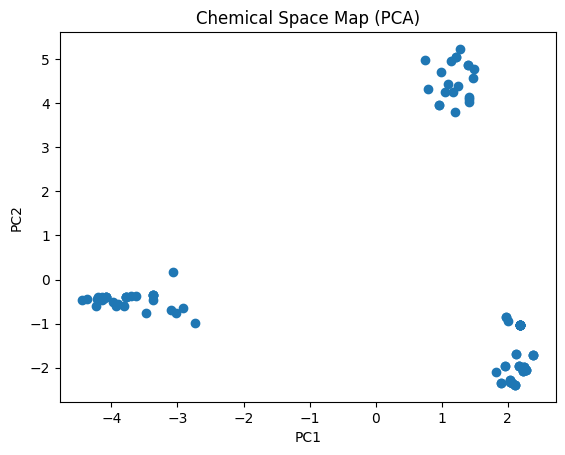

In [15]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)

plt.scatter(X_reduced[:, 0], X_reduced[:, 1])
plt.title("Chemical Space Map (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


C:\Users\NCT\anaconda3\envs\py311_tf\Lib\site-packages\sklearn\manifold\_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


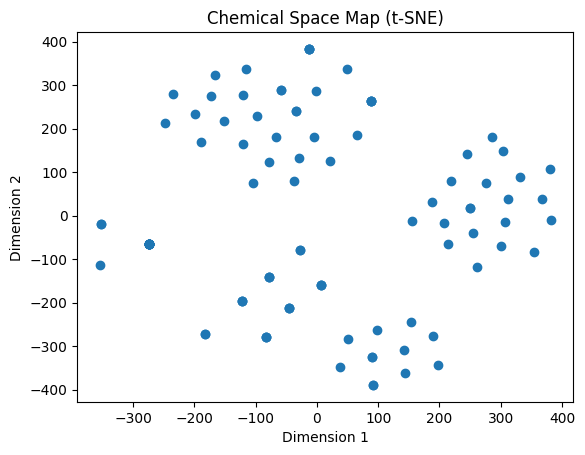

In [16]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title("Chemical Space Map (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()

In [17]:
desc_df = pd.DataFrame(X, columns=[f'bit_{i}' for i in range(1024)])
desc_df.insert(0, 'molregno', df['molregno'])
desc_df.to_csv("../data/T10_fingerprints.csv", index=False)